In [1]:
%matplotlib inline
import matplotlib.pyplot as plt  # type: ignore
import numpy as np
import numpy.typing as npt

from data.gaussian_classes import gaussian_class_data
from grid.hyperparameters import (ParameterSpace, expand_grid, f1_macro_metric,
                                  full_data_slices, increasing_subslices,
                                  plot_classification_predictions,
                                  plot_metrics)
from neural_network import NeuralNetwork

# np.set_printoptions(threshold=sys.maxsize)

In [2]:
means = [
    np.array([0.0, 0.0]),
    np.array([3.0, 3.0]),
    np.array([-3, 3]),
]
covariances = [
    np.array(
        [
            [1.0, 0.0],
            [0.0, 1.0],
        ]
    ),
    np.array(
        [
            [2.0, 0.0],
            [0.0, 2.0],
        ]
    ),
    np.array(
        [
            [1.0, 0.0],
            [0.0, 1.0],
        ]
    ),
]
data = gaussian_class_data(means, covariances, n_train=1000, n_test=1000)

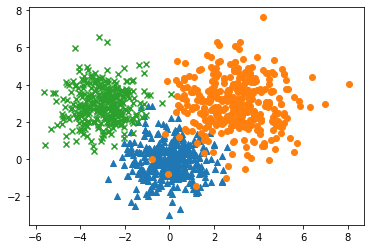

In [3]:
class_1 = data.x_train[data.y_train[:, 0] == 1.0]
class_2 = data.x_train[data.y_train[:, 1] == 1.0]
class_3 = data.x_train[data.y_train[:, 2] == 1.0]
plt.scatter(class_1[:, 0], class_1[:, 1], marker="^")
plt.scatter(class_2[:, 0], class_2[:, 1], marker="o")
plt.scatter(class_3[:, 0], class_3[:, 1], marker="x")

In [4]:
%%capture

parameter_spaces = [
    ParameterSpace(
        model=NeuralNetwork,
        keyword="max_iterations",
        base_parameters={"hidden_units": [10], "batch_size": 1, "learning_rate": 0.04},
        space=[10 + i * 200 for i in range(0, 10)],
        base_data=data,
        data_slices=full_data_slices(len(data.x_train)),
    ),
    ParameterSpace(
        model=NeuralNetwork,
        keyword="learning_rate",
        base_parameters={"hidden_units": [10], "batch_size": 1, "max_iterations": 1000},
        space=np.linspace(0.0001, 0.2, 10),
        base_data=data,
        data_slices=full_data_slices(len(data.x_train)),
    ),
    ParameterSpace(
        model=NeuralNetwork,
        # TODO fix to allow not providing a keyword (in the case that only the data varies)
        base_parameters={
            "hidden_units": [10],
            "learning_rate": 0.04,
            "max_iterations": 1000,
        },
        space=[1 for _ in range(10)],
        base_data=data,
        data_slices=increasing_subslices(30, 1000, 10),
    ),
]

grid = expand_grid(parameter_spaces)

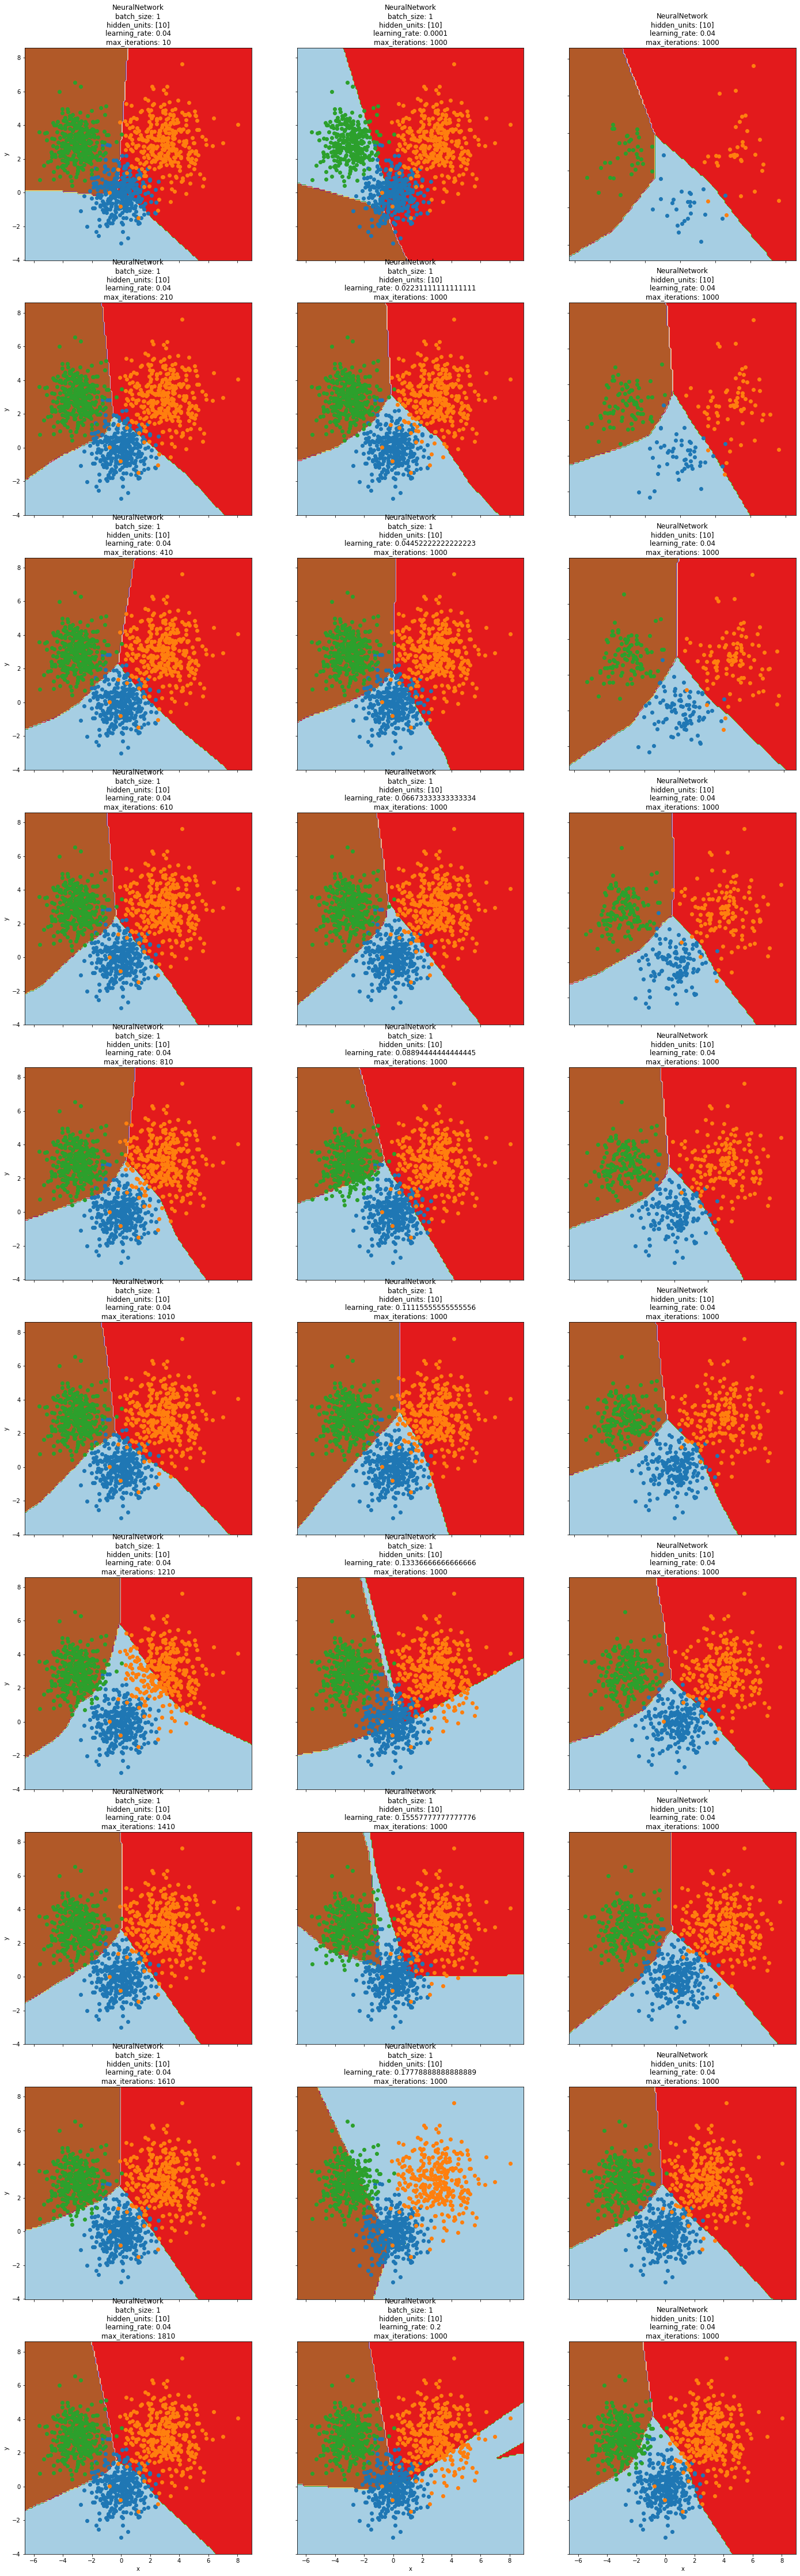

In [5]:
plot_classification_predictions(plt, grid)

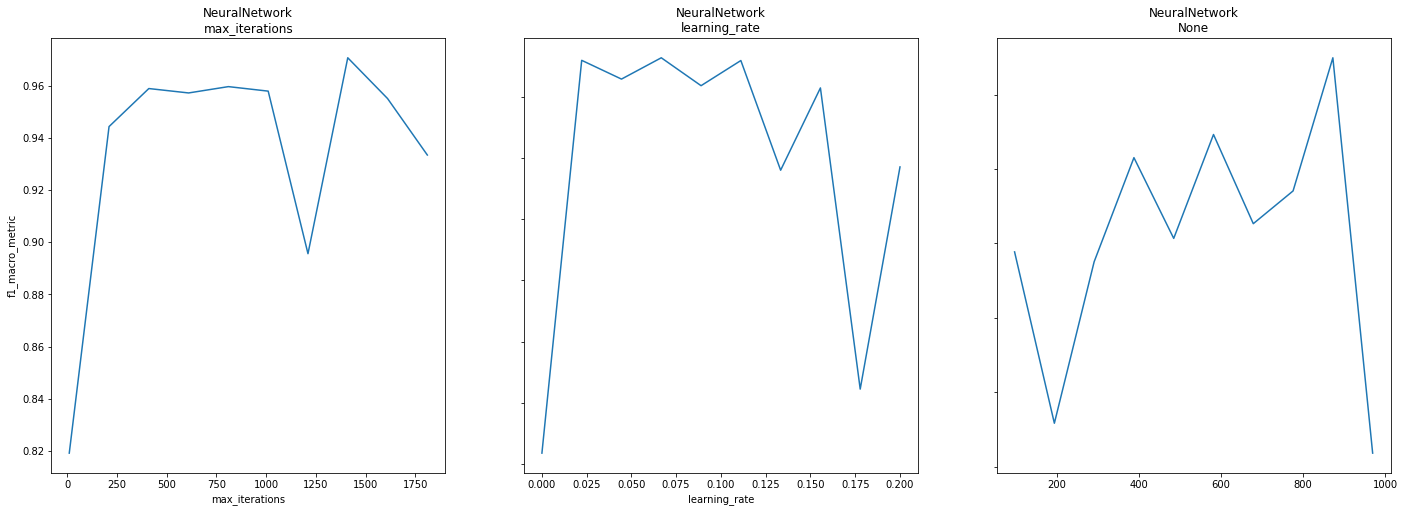

In [6]:
plot_metrics(plt, grid, f1_macro_metric)